/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


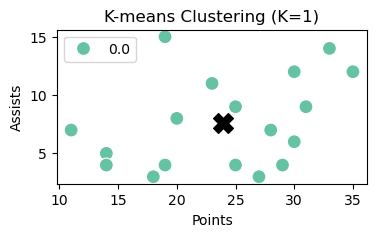

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


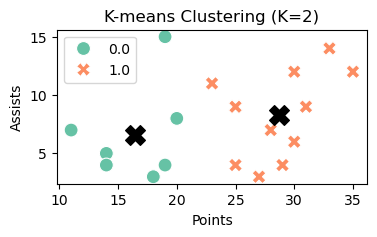

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


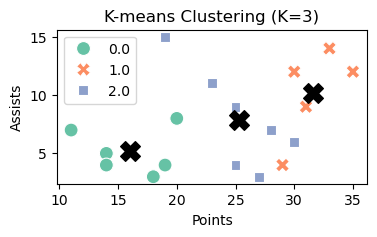

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


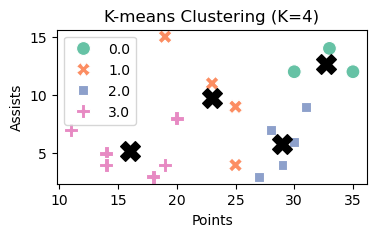

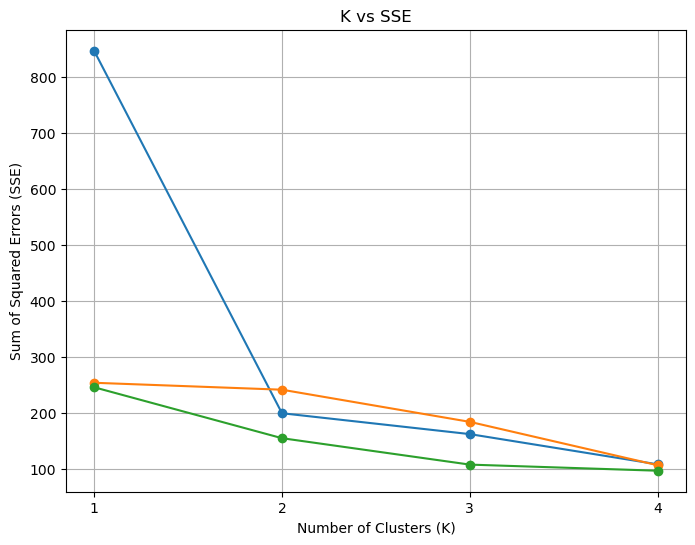

Optimal K is: 3


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("baseball.csv")

def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))

def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1/p)

def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == 'euclidean':
                distances = [euclidean_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'manhattan':
                distances = [manhattan_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'minkowski':
                distances = [minkowski_distance(data.iloc[i], centroid) for centroid in centroids]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = points_in_cluster.mean().to_numpy() if not points_in_cluster.empty else centroids[i]
            new_centroids.append(new_centroid)
        
        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(data=data, x='Points', y='Assists', hue=clusters, palette='Set2', style=clusters, s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()

sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, 'euclidean')
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f'Optimal K is: {optimal_k}')


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


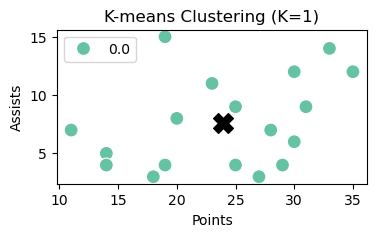

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


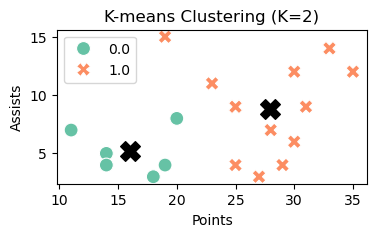

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


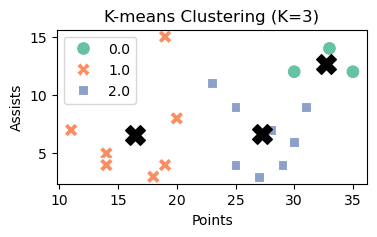

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


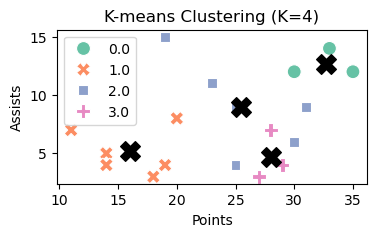

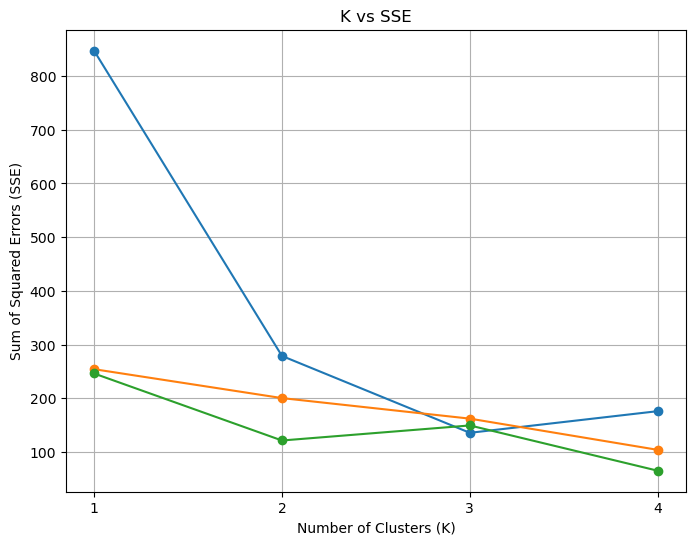

Optimal K is: 4


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("baseball.csv")

def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))

def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1/p)

def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == 'euclidean':
                distances = [euclidean_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'manhattan':
                distances = [manhattan_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'minkowski':
                distances = [minkowski_distance(data.iloc[i], centroid) for centroid in centroids]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = points_in_cluster.mean().to_numpy() if not points_in_cluster.empty else centroids[i]
            new_centroids.append(new_centroid)
        
        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(data=data, x='Points', y='Assists', hue=clusters, palette='Set2', style=clusters, s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()

sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, 'manhattan')
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f'Optimal K is: {optimal_k}')


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


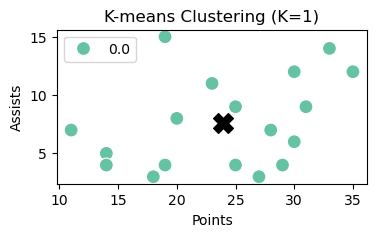

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


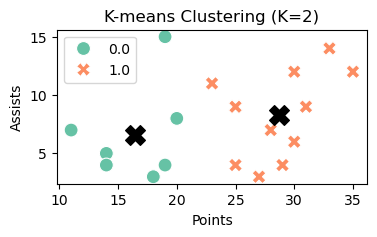

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


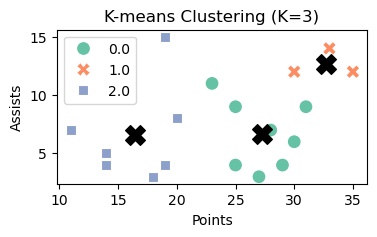

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


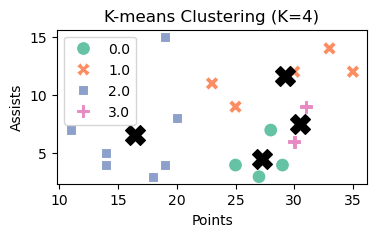

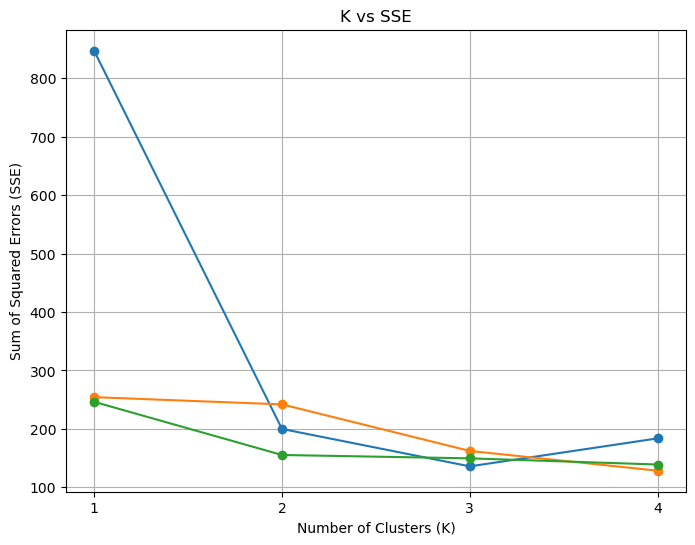

Optimal K is: 3


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("baseball.csv")

def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))

def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1/p)

def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == 'euclidean':
                distances = [euclidean_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'manhattan':
                distances = [manhattan_distance(data.iloc[i], centroid) for centroid in centroids]
            elif distance_metric == 'minkowski':
                distances = [minkowski_distance(data.iloc[i], centroid) for centroid in centroids]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = points_in_cluster.mean().to_numpy() if not points_in_cluster.empty else centroids[i]
            new_centroids.append(new_centroid)
        
        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(data=data, x='Points', y='Assists', hue=clusters, palette='Set2', style=clusters, s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()

sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, 'minkowski')
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f'Optimal K is: {optimal_k}')
